Motivation

Testing the new templates for redshift fitting. For that we need to define a sample of main-survey tiles (both bright and dark, observed in a range of conditions).

In [1]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd

In [2]:
# My universe set will be the tiles included in iron

In [3]:
iron_tiles = fitsio.read('/global/cfs/cdirs/desi/spectro/redux/iron/tiles-iron.fits')

In [4]:
is_main = iron_tiles['SURVEY']=='main'
is_dark = iron_tiles['PROGRAM']=='dark'
is_bright = iron_tiles['PROGRAM']=='bright'

In [5]:
iron_tiles

array([(80615, 'cmx', 'other', 'm33', 'cmxm33',  4,  3600.1,  24.027, 31.39 ,  0. , 3298.4, 0., 1000., 'obsend', 3204.8, 3298.4, 3196.1,  3552.9, 'other', 0.9 , 20201216),
       (80609, 'sv1', 'dark', 'lrgqso', 'cmxlrgqso', 15, 13500.7, 150.12 ,  2.206,  0. , 7779.9, 0., 4000., 'obsend', 7670.3, 7779.9, 7978.7, 10690.3, 'dark', 0.9 , 20201217),
       (80606, 'sv1', 'dark', 'elg', 'cmxelg', 12, 10800.7,  36.448, -4.501,  0. , 6650.8, 0., 4000., 'obsend', 6405.5, 6650.8, 6510.6,  7235.5, 'dark', 0.9 , 20201219),
       ...,
       (40275, 'main', 'backup', 'backup', 'mainbackup',  1,   601.1, 219.357,  9.389, 48.9,   74.4, 0.,   60., 'obsend',   66.5,   78. ,   69.6,    43.1, 'backup', 0.85, 20220613),
       (42339, 'main', 'backup', 'backup', 'mainbackup',  2,   820.8, 290.287, 32.816, 57.4,   71.4, 0.,   60., 'obsend',   69.4,   86.3,   70.1,    20.8, 'backup', 0.85, 20220613),
       (40336, 'main', 'backup', 'backup', 'mainbackup',  1,   603. , 276.744, 23.285, 43.1,   65.4, 0.,  

In [6]:
print('Dark tiles in main survey', np.count_nonzero(is_main & is_dark))
print('Bright tiles in main survey', np.count_nonzero(is_main & is_bright))

Dark tiles in main survey 2744
Bright tiles in main survey 2275


In [7]:
conditions = ['EXPTIME', 'EFFTIME_SPEC', 'TILEDEC']

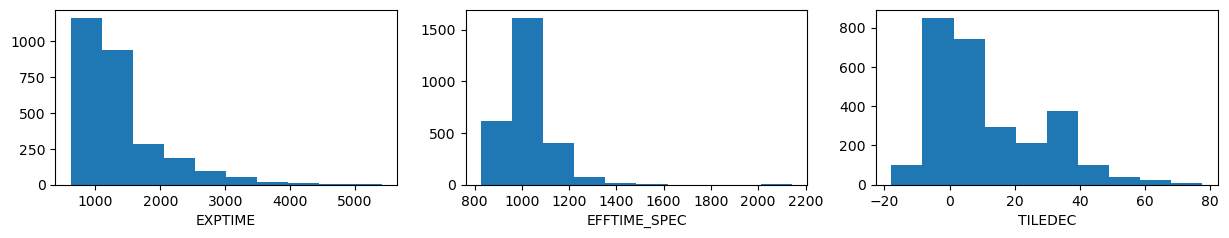

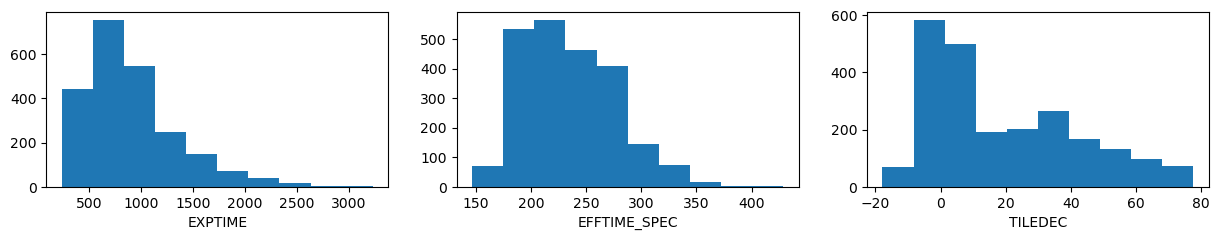

In [8]:
plt.figure(figsize=(15,5))
for i, c in enumerate(conditions):
    plt.subplot(2,len(conditions), i+1)
    plt.hist(iron_tiles[c][is_dark & is_main])
    plt.xlabel(c)
    
plt.figure(figsize=(15,5))
for i, c in enumerate(conditions):
    plt.subplot(2,len(conditions), (i+1)+len(conditions))
    plt.hist(iron_tiles[c][is_bright & is_main])
    plt.xlabel(c)

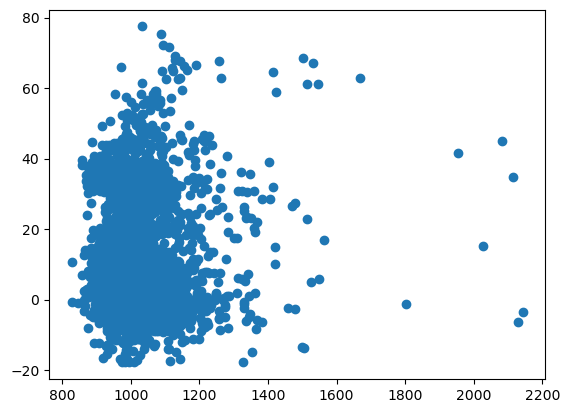

In [9]:
plt.scatter(iron_tiles['EFFTIME_SPEC'][is_main&is_dark], iron_tiles['TILEDEC'][is_main&is_dark])

In [10]:
def sample_tiles(input_tiles, conditions):
    # now we select the boundaries for three different regions: below median, around median, above median
    subset_percent = {}
    for c in conditions:
        subset_percent[c] = np.percentile(input_tiles[c],[0,33,66,100]) 
        print(subset_percent[c])
    
    
    # now define all the possible permutations of the three different regions over the four different conditions
    n_c = len(conditions)

    # Define the elements
    elements = [0, 1, 2]

    # Generate all permutations of length n_c
    permutations = list(itertools.product(elements, repeat=n_c))
    print(len(permutations))
    tileids = []
    ntiles = []
    # Print the permutations
    for perm in permutations:
        a = list(perm)
        is_in_permutation = np.array([True] * len(input_tiles))
        for i, c in enumerate(conditions):
            is_in_condition = (input_tiles[c]>=subset_percent[c][a[i]]) & (input_tiles[c]<=subset_percent[c][a[i]+1])
            is_in_permutation &= is_in_condition
        #print(perm, np.count_nonzero(is_in_permutation))
        tmp_tiles = input_tiles[is_in_permutation]
        random_indices = np.random.choice(tmp_tiles.shape[0], size=1, replace=False)
        random_tile = tmp_tiles[random_indices]
        print(random_tile)
        tileids.append(random_tile['TILEID'][0])
        ntiles.append(np.count_nonzero(is_in_permutation))
    return tileids, ntiles

In [11]:
dark_tiles = iron_tiles[['TILEID']+conditions][is_main & is_dark]
darkids, ndark = sample_tiles(dark_tiles, conditions)

[ 622.3   1027.447 1377.214 5407.2  ]
[ 827.5    977.419 1037.5   2142.3  ]
[-17.841     0.8215   14.24248  77.502  ]
27
[(4729, 934.6, 954.4, -2.611)]
[(3055, 836.6, 956.3, 13.727)]
[(4601, 1021.3, 885.2, 27.502)]
[(2490, 707.9, 998.9, -2.345)]
[(3384, 891.7, 1032., 11.774)]
[(6869, 1015., 1034.9, 36.522)]
[(3257, 882.8, 1041.4, -7.691)]
[(7672, 808.6, 1043.6, 6.414)]
[(1409, 857.3, 1040.8, 25.78)]
[(7205, 1221.1, 946.7, 0.234)]
[(9923, 1048.2, 923.8, 3.258)]
[(2389, 1113.6, 948.9, 29.231)]
[(1830, 1072.3, 1012.6, -0.324)]
[(9290, 1333.1, 977.8, 7.579)]
[(3296, 1038.7, 1009.4, 38.368)]
[(10270, 1369., 1054.5, -11.782)]
[(1715, 1327.5, 1118.2, 9.389)]
[(1246, 1052.6, 1112.4, 23.361)]
[(8368, 3849.3, 944.8, 0.361)]
[(5514, 2550.6, 909.9, 10.989)]
[(8403, 1633.5, 950.9, 44.397)]
[(8090, 1670.6, 1019.5, -0.716)]
[(5833, 1863.3, 1031.7, 7.11)]
[(5141, 1574.8, 1000.8, 25.058)]
[(2667, 2008.9, 1172.2, -1.803)]
[(7361, 2541.4, 1090.6, 0.95)]
[(2196, 3560., 1057.9, 34.258)]


In [12]:
bright_tiles = iron_tiles[['TILEID']+conditions][is_main & is_bright]
brightids, nbright = sample_tiles(bright_tiles, conditions)

[ 239.6    665.784  981.4   3227.1  ]
[146.9   209.3   252.484 428.4  ]
[-17.841     2.687    28.30692  77.653  ]
27
[(23233, 358.8, 187.5, -0.339)]
[(25132, 291.1, 189.9, 24.671)]
[(22443, 403.1, 195.3, 40.88)]
[(23127, 571.9, 241.3, -7.503)]
[(23339, 578.4, 228.9, 15.396)]
[(21204, 454.1, 220.6, 36.1)]
[(22158, 645.9, 263.7, -3.807)]
[(25553, 433.7, 276.3, 4.91)]
[(25073, 635.3, 263.6, 41.758)]
[(24663, 807.9, 189.9, -6.929)]
[(24957, 720.9, 206.8, 27.988)]
[(24011, 909.2, 200.7, 36.258)]
[(21556, 925.6, 241.5, -7.159)]
[(24355, 821.6, 251.4, 12.412)]
[(21191, 960.7, 242., 49.873)]
[(21539, 692.9, 272.5, -2.959)]
[(23352, 719.8, 255., 8.043)]
[(20767, 704.4, 266.2, 43.062)]
[(22239, 2092.8, 181.6, -6.199)]
[(23216, 1162.4, 186.4, 17.332)]
[(20511, 1150.6, 174.6, 68.832)]
[(24976, 1320.5, 223., -1.907)]
[(25108, 1245.4, 246.5, 20.914)]
[(24350, 1188., 227.4, 28.953)]
[(23852, 1003.4, 287.2, -2.729)]
[(20303, 1240., 306.1, 25.153)]
[(20593, 1214.1, 307.7, 50.926)]


In [13]:
output = {}
output['TILEID'] = darkids+brightids
output['NTILE_SIMILAR'] = ndark+nbright
df = pd.DataFrame.from_dict(output)
# Save the DataFrame to a CSV file
df.to_csv('sample_tiles_iron.csv', index=False)

In [47]:
iron_exposures = fitsio.read('/global/cfs/cdirs/desi/spectro/redux/iron/exposures-iron.fits')

In [48]:
is_main = iron_tiles['SURVEY']=='main'
is_dark = iron_tiles['PROGRAM']=='dark'
is_bright = iron_tiles['PROGRAM']=='bright'

In [ ]:
print('Dark exposures in main survey', np.count_nonzero(is_main & is_dark))
print('Bright exposures in main survey', np.count_nonzero(is_main & is_bright))